In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\evalution data\phase1-2\raw.githubusercontent.com_dsrscientist_Data-Science-ML-Capstone-Projects_master_avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [61]:
data.shape

(16468, 14)

In [62]:
#data=data.drop(columns=['Unnamed: 0'],['Date'])  # remove unwanted column

In [63]:
data=data.drop(columns=['Unnamed: 0','Date'],axis=1)  # remove unwanted column

In [64]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [65]:
data.isna().sum()  #checking null values

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [66]:
data.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
dtypes: float64(10), object(2)
memory usage: 1.5+ MB


In [67]:
data=data.dropna()  # we delete null values bcz if we fill data with then our model is baised

In [ ]:
data.isna().sum()  #checking null values

In [69]:
for i in data.columns:
    print(data[i].value_counts())  # cheking all counts 
    print('\n')

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64


64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: Total Volume, Length: 1517, dtype: int64


1036.74       1
193228.98     1
2166801.03    1
2295315.43    1
180977.06     1
             ..
93556.40      1
57713.02      1
61125.82      1
110439.42     1
43116.41      1
Name: 4046, Length: 1517, dtype: int64


54454.85      1
45809.76      1
1226508.86    1
1290847.05    1
46253.49      1
             ..
12101.67      1
9666.15       1
8956.16       1
11892.01      1
54193.42      1
Name: 4225, Length: 1517, dtype: int64


57.68        2
48.16        1
271514.98    1
392846.12    1
12923.45     1
            ..
834.92       1
796.53       1
995.43       1
411.40       1
16563.91     1
Name: 4

In [70]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['type', 'region']


numerical= ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [71]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


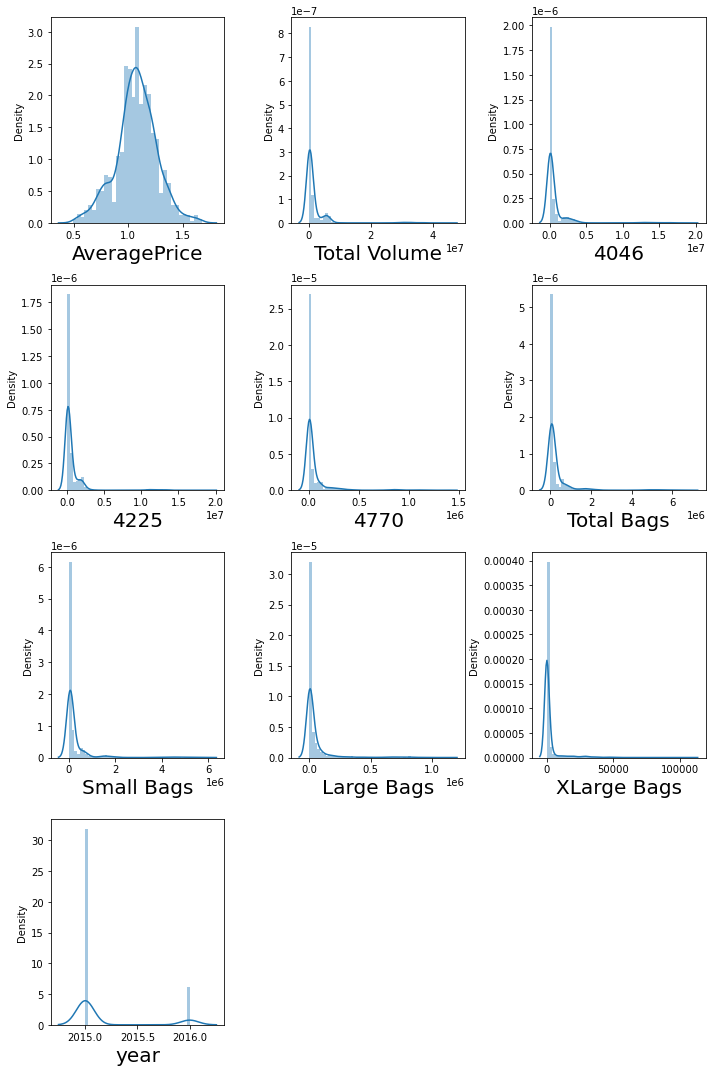

In [72]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# deal with outliers

In [73]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1439.000000,1.439000e+03,1.439000e+03,1.439000e+03,1439.000000,1.439000e+03,1.439000e+03,1439.000000,1439.000000,1439.000000
mean,1.077596,9.091137e+05,3.609337e+05,3.576393e+05,28782.187199,1.617585e+05,1.369595e+05,23911.395413,887.658478,2015.147325
std,0.189771,1.497113e+06,7.547241e+05,5.636506e+05,59048.862626,2.840388e+05,2.451930e+05,49464.163690,2969.232199,0.354552
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000,3.311770e+03,3.311770e+03,0.000000,0.000000,2015.000000
25%,0.980000,1.418781e+05,1.813665e+04,4.017507e+04,785.765000,3.438787e+04,2.809153e+04,442.505000,0.000000,2015.000000
50%,1.080000,3.698200e+05,7.038217e+04,9.981520e+04,6545.550000,7.052002e+04,5.787961e+04,4248.290000,0.000000,2015.000000
75%,1.190000,8.417819e+05,2.699862e+05,4.090717e+05,20914.415000,1.297735e+05,1.111061e+05,21658.065000,181.340000,2015.000000
max,1.680000,8.567534e+06,4.668965e+06,3.403145e+06,426600.810000,2.391861e+06,2.122673e+06,343389.610000,23926.610000,2016.000000


In [55]:
#data.astype(float)

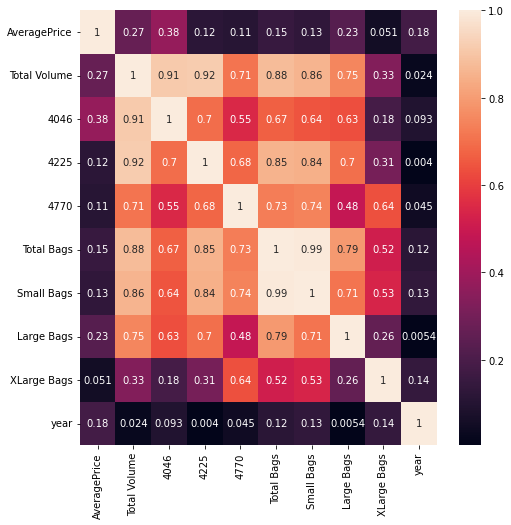

In [74]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [75]:
# here 4046 and total valume are highly related
# here 4225 ,total bags, samall bags,and large bags are highly related with total valume are highly related
# check for multicolinearity issue

In [76]:
relation['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
4046            0.376074
Total Volume    0.266735
Large Bags      0.228242
year            0.182109
Total Bags      0.151845
Small Bags      0.129242
4225            0.117170
4770            0.107163
XLarge Bags     0.050749
Name: AveragePrice, dtype: float64

# Encoding categorical data¶

In [77]:
df1=pd.get_dummies(data,columns=['type','region']) # it is same as one hod encode but here is index name coming
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,...,0,0,0,0,0,0,0,0,0,0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,...,0,0,0,0,0,0,0,0,0,0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,...,0,0,0,0,0,0,0,0,0,0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data=df1 # asining in

In [79]:
x=data.drop(columns=['AveragePrice']) #Region,and country are object data
y=data['AveragePrice']

In [80]:
# trainning and spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=202)

# MODEL BUILDING

In [81]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [102]:
#predicting(the result) on test data or outcome
y_pred=reg.predict(x_test)
y_pred

array([1.09363592, 0.95368603, 1.03714866, 0.99420556, 1.0956543 ,
       1.05593343, 0.99181153, 1.03063448, 1.09860221, 0.61168429,
       1.13684645, 0.75941643, 1.1244137 , 1.05565055, 1.09151655,
       0.78829345, 1.21147824, 1.03551203, 1.09554839, 0.9736774 ,
       1.0955691 , 1.18722231, 1.22438269, 1.01241091, 1.11092006,
       1.02531703, 0.99503529, 1.00513431, 1.15425312, 1.06732502,
       1.01561438, 1.24008073, 1.1265696 , 1.15495285, 1.06157483,
       1.23204479, 1.02777675, 1.01165819, 0.69458417, 1.20093868,
       1.16117061, 1.24137051, 0.80780608, 1.02721832, 1.1895946 ,
       0.63336871, 1.23388582, 1.26551808, 1.14642614, 1.28084778,
       1.23785811, 0.99301843, 1.31548135, 1.11289053, 1.04413794,
       1.27313143, 1.18397571, 1.08860576, 1.20156775, 1.05994034,
       0.95182085, 1.1798402 , 1.03076447, 0.98697579, 1.14542924,
       1.00477889, 1.03018499, 1.05241355, 1.01708431, 1.2587984 ,
       0.86959611, 0.8953165 , 1.09571129, 1.17960948, 1.18620

In [103]:
reg.score(x_train,y_train) # how much it understood on training data

0.7142451478497124

In [104]:
#how model fit on test data
reg.score(x_test,y_test)

0.669323751363025

# 2nd model

In [107]:
from sklearn.ensemble import AdaBoostRegressor

In [108]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

In [109]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [110]:
y_pred=ada.predict(x_train) #for train data

In [111]:
accuracy=metrics.r2_score(y_train,y_pred)
print(accuracy)

0.68132695361217


In [112]:
y_pred_test=ada.predict(x_test)  # for test data

In [113]:
accuracy=metrics.r2_score(y_test,y_pred_test)
print(accuracy)

0.5868124476646108


# Accuracy is 71% whichich is very low lets use hyper tunning

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
param={'n_estimators':[47,50,60,70,80,43,58,49,53],'learning_rate':[0.25,0.30,0.40,0.09]}

In [133]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=param)

In [134]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4, 0.09],
                                        'n_estimators': [47, 50, 60, 70, 80, 43,
                                                         58, 49, 53]})

In [135]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=80)

In [136]:
ada=AdaBoostRegressor(learning_rate=0.17, n_estimators=60)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

print(metrics.r2_score(y_test,y_pred))


0.5621548304555859


# final accuracy -56%